In [1]:
#credit: Muller
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 350

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

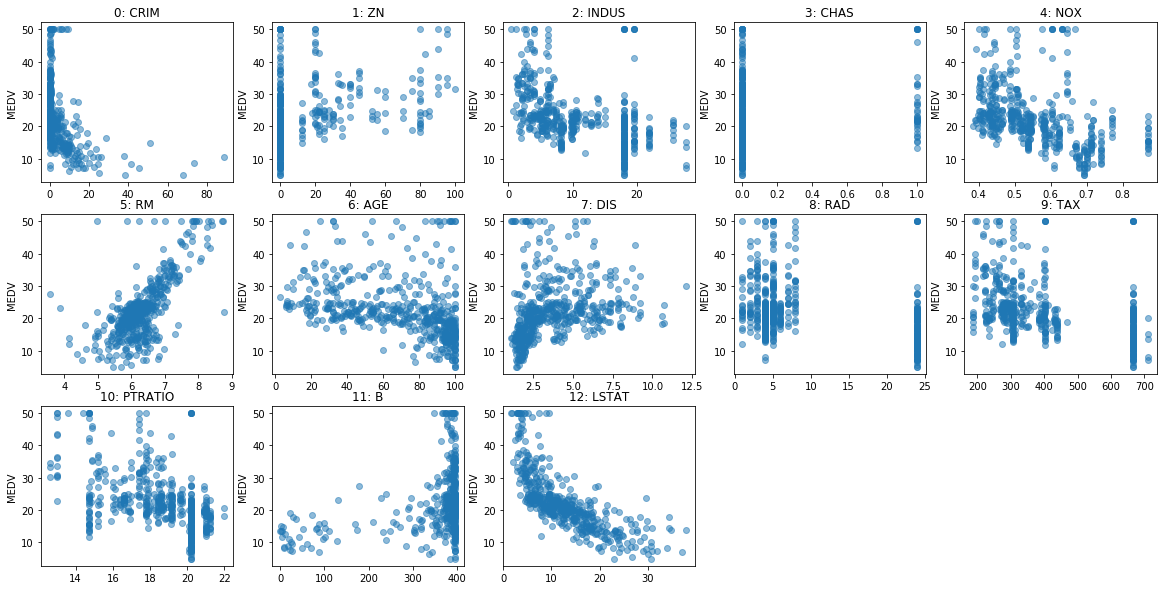

In [3]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10)) #facecolor='w', edgecolor='k')
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.49901769734878754, 0.1459168750863542)

In [7]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7502341979953768, 0.10562600471156965)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

knn = KNeighborsRegressor()

knn.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
knn.score(X_test_scaled, y_test)

0.606952770711171

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
scores = cross_val_score(knn_pipe, X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7455608822349746, 0.10625173604969355)

In [11]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((("scaler", StandardScaler()),
                 ("regressor", KNeighborsRegressor)))

In [12]:
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 7}
0.5999825126971097


In [20]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV


In [21]:
X, y = boston.data, boston.target


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [23]:
score = cross_val_score(LinearRegression(), X_train, y_train, cv=10)
np.mean(score)


0.7160133196648378

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 13)}
print(param_grid)

{'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])}


In [25]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid=False, n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [26]:
grid.best_params_

{'alpha': 0.1}

In [27]:
grid.best_score_


0.7160600746856847

In [28]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)

In [29]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000850,0.000523,0.000614,0.000125,0.001,{'alpha': 0.001},0.783264,0.703124,0.555585,0.732900,...,0.766419,0.747077,0.734746,0.752195,0.737612,0.749494,0.743946,0.764885,0.749152,0.009893
1,0.000641,0.000121,0.000494,0.000092,0.00316228,{'alpha': 0.0031622776601683794},0.783242,0.703110,0.555572,0.733042,...,0.766419,0.747077,0.734746,0.752194,0.737612,0.749494,0.743946,0.764885,0.749152,0.009893
2,0.000609,0.000117,0.000448,0.000033,0.01,{'alpha': 0.01},0.783172,0.703064,0.555533,0.733482,...,0.766418,0.747075,0.734745,0.752194,0.737611,0.749493,0.743945,0.764884,0.749151,0.009893
3,0.000578,0.000061,0.000488,0.000088,0.0316228,{'alpha': 0.03162277660168379},0.782949,0.702916,0.555412,0.734819,...,0.766412,0.747065,0.734738,0.752188,0.737603,0.749487,0.743939,0.764878,0.749144,0.009893
4,0.000538,0.000030,0.000458,0.000054,0.1,{'alpha': 0.1},0.782228,0.702439,0.555058,0.738537,...,0.766356,0.746974,0.734677,0.752133,0.737532,0.749434,0.743885,0.764819,0.749082,0.009896
